# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID" )

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
number_mice = merged_data["Mouse ID"].value_counts()
number_mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint = merged_data[["Mouse ID","Timepoint"]]
duplicated_row = mouse_timepoint[mouse_timepoint.duplicated()]
duplicated_mice = duplicated_row["Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989 = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop(merged_data[merged_data["Mouse ID"] == "g989"].index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
reg_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume":reg_mean,
    "Median Tumor Volume":reg_median,
    "Tumor Volume Variance": reg_var,
    "Tumor Volume Std. Dev.":reg_std,
    "Tumor Volume Std. Err.": reg_sem
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_1 = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats_1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

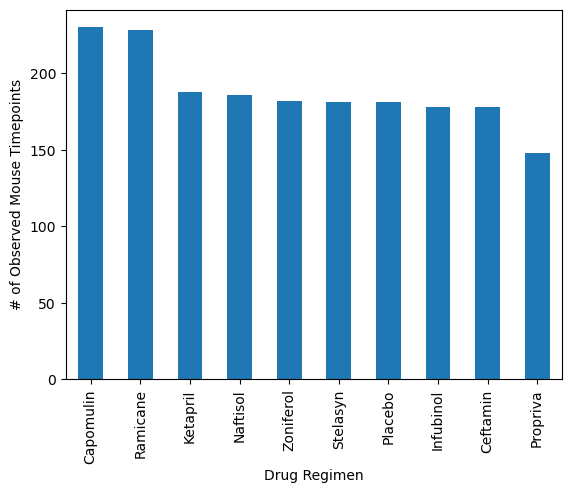

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data["Drug Regimen"].value_counts()
drug_counts.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

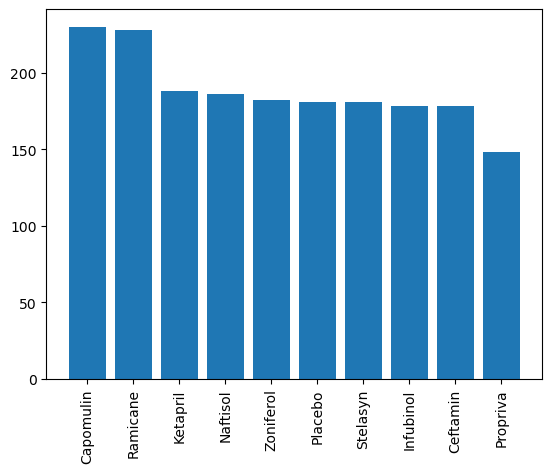

In [33]:
drug_counts = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis, drug_counts.values)

plt.xticks(x_axis, drug_counts.index,rotation=90)
plt.show()

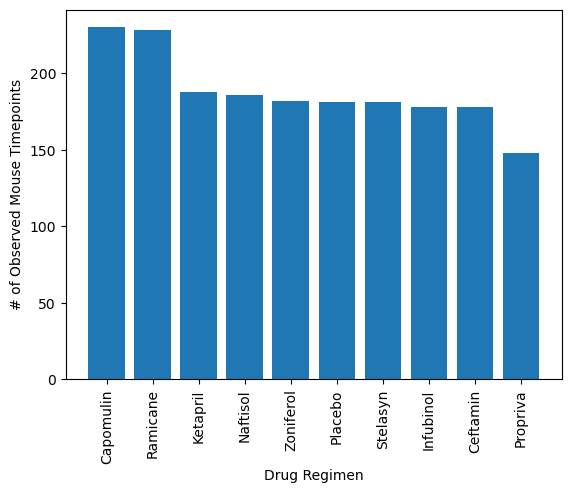

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis, drug_counts.values)

plt.xticks(x_axis, drug_counts.index,rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

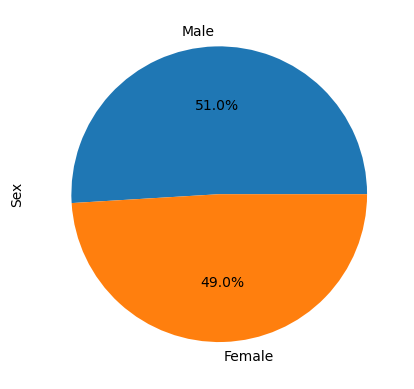

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data["Sex"].value_counts()
gender_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%")
plt.show()

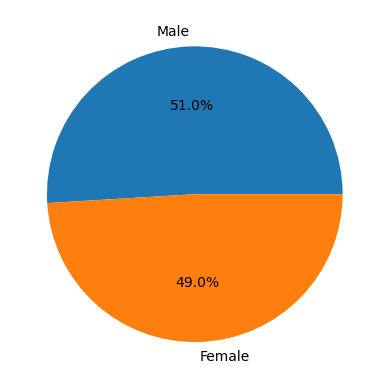

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_counts.index.tolist()
sizes = gender_counts.tolist()

plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
clean_data_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
clean_data_4 = clean_data[clean_data["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_data_4.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(clean_data_4, max_timepoint,on=["Mouse ID", "Timepoint"])
final_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_per_treat = []
outliers = []

for specific_treat in treatments:
    
    tumor_vol_data = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == specific_treat, "Tumor Volume (mm3)"]
    tumor_volume_per_treat.append(tumor_vol_data)
    print (tumor_volume_per_treat)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_vol_data.quantile([0.25,0.5,0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3 - Q1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    upper_bound = Q3 + (1.5*iqr)
    lower_bound = Q1 - (1.5*iqr)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    upper_bound = Q3 + (1.5*iqr)
    lower_bound = Q1 - (1.5*iqr)

    potential_outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    outliers.append(potential_outliers)





[1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
32    38.753265
34    38.125164
35    39.952347
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
82    46.539206
Name: Tumor Volume (mm3), dtype: float64]
[1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
32    38.753265
34    38.125164
35    39.952347
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
82    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15

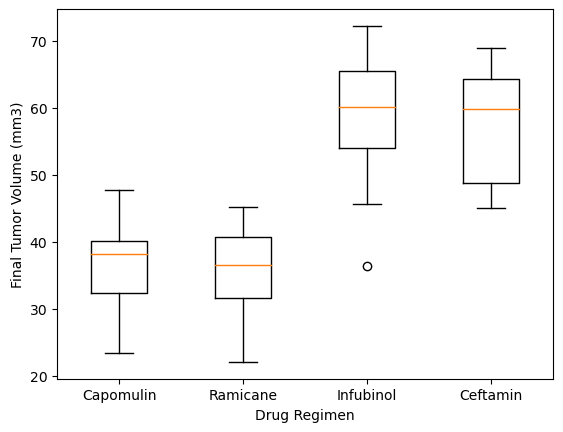

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_per_treat)
ax.set_xticklabels(treatments)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

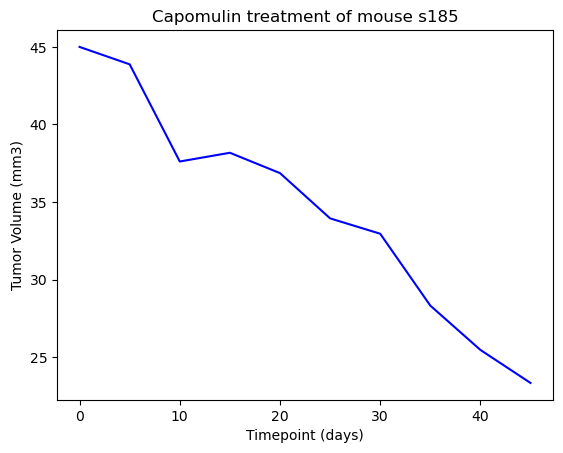

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = "s185"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
single_mouse = plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()

In [93]:
average_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean
average_volume

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fd671a250c0>>

In [87]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


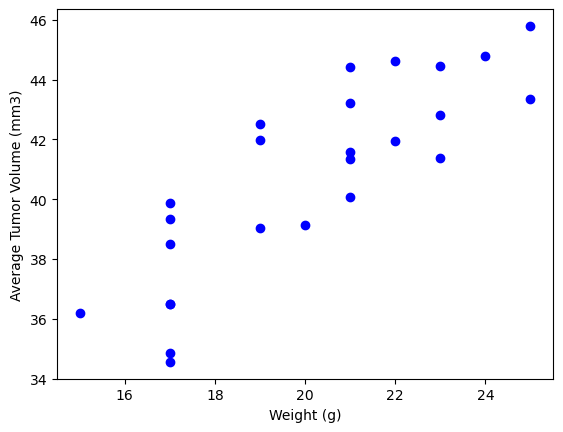

In [95]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
tumor_avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter (mouse_avg_weight,tumor_avg_vol, color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

y = 0.95x + 21.55
The r-squared is: 0.7088568047708721


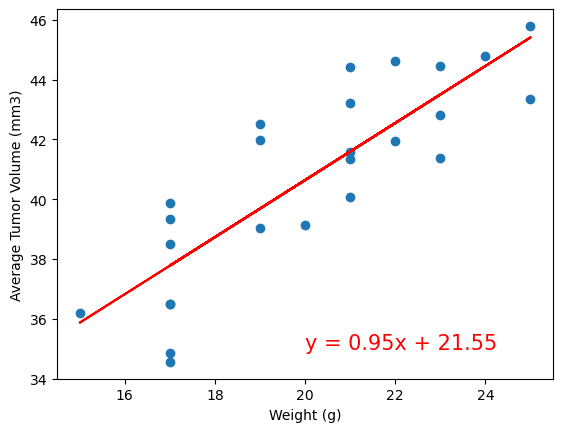

In [105]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_avg_weight
y_values = tumor_avg_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()